# Comparing Means


|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*|Non-parametric Test|  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*|One sample Wilcoxon signed rank test|   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*|Mann-Whitney's test|   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances|Kruskal-Wallis test|   

\*If assumptions can't be met, the equivalent non-parametric test can be used.   
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.   

## One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.  

### Example 1

I believe customers who churn are charged more (monthly average) than the overall average monthly charges.  
Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers? 

We will use a 1-tailed ("significantly higher"), 1-sample (comparing 1 group to the average) t-test.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

df = pd.read_csv("Cust_Churn_Telco.csv")  

**A. Plot Distribution**

<AxesSubplot:>

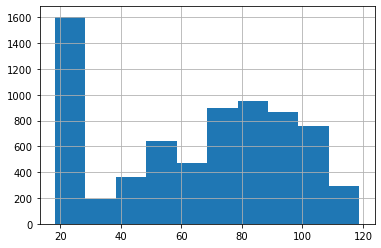

In [2]:
df['MonthlyCharges'].hist()

<AxesSubplot:>

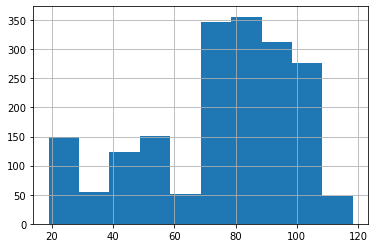

In [3]:
churn_sample = df[df.Churn=='Yes'].MonthlyCharges

churn_sample.hist()

In [4]:
df.shape

(7043, 21)

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers  

**C. Set Alpha**

In [5]:
alpha = .05

**D. Verify Assumptions**

In [6]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Our churn sample is large enough, as is overall count, to meet the assumptions of normal distributions. 

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [7]:
churn_sample = df[df.Churn=='Yes'].MonthlyCharges
churn_sample

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

In [8]:
overall_mean = df.MonthlyCharges.mean()
overall_mean

64.76169246059922

In [9]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p, p/2, alpha)

16.965403080505645 3.7406392993841064e-60 1.8703196496920532e-60 0.05


**F. Decide**

Is 1/2 * p < alpha AND t > 0? 

Is $t > 0$ and $p/2 < \alpha$

In [10]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


## Example 2

**A. Distributions** See above

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers == Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers != Mean of monthly charges of all customers  

**C. Set Alpha** See above  

**D. Assumptions** See above  

**E. Compute test statistics**

In [11]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)
t, p

(16.965403080505645, 3.7406392993841064e-60)

**F. Is p-value less than alpha?**

In [12]:
p < alpha

True

## Example 3

**A. Distributions** See above

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers >= Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers < Mean of monthly charges of all customers  

**C. Set Alpha** See above  

**D. Assumptions** See above  

**E. Compute test statistics**

In [13]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)
t, p

(16.965403080505645, 3.7406392993841064e-60)

**F. Decide**

Is 1/2 of p-value < alpha AND t-stat < 0? 

In [14]:
print(t < 0)
print(p/2 < alpha)

False
True


## Independent T-Test (a.k.a. Two Sample T-Test)

Goal: Compare mean of group a to mean of group b. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{a} != \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly smaller than b)|$H_{a}$|$\mu_{a} < \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly larger than b)|$H_{a}$|$\mu_{a} < \mu_{b}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions:  
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  
    - Independent samples  
    - Equal Variances (or set method argument to False when not  


5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_ind`

6. Decide. 

### Example 1

I believe customers who churn are charged more (monthly average) than customers who don't churn. 
Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn? 

We will use a 1-tailed ("significantly higher"), 2-sample (comparing 2 independent groups to each other) t-test.  

<AxesSubplot:>

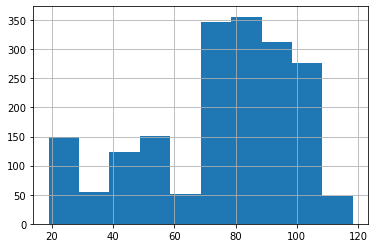

In [15]:
churn_sample = df[df.Churn=='Yes'].MonthlyCharges

churn_sample.hist()

<AxesSubplot:>

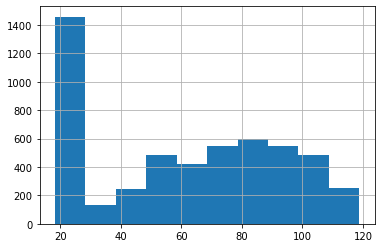

In [16]:
no_churn_sample = df[df.Churn=='No'].MonthlyCharges

no_churn_sample.hist()

**Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers <= Mean of monthly charges of customers who haven't churned  
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of customers who haven't churned  

**Set Alpha**

In [17]:
alpha = .05

**Verify Assumptions**

1. Independent Samples (n.a. for 1-sample t-test). YES! no observations in the churn sample exist in the no-churn sample. 

2. Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT).  YES! Plenty of observations

3. Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

In [18]:
print(churn_sample.var())
print(no_churn_sample.var())

608.4141833954304
966.7527670734287


NO! so we will set the argument of equal_var to False. 

**Compute Test Statistic**

In [19]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var = False)
t, p/2

(18.407526676414673, 4.2962246657737696e-73)

**Decide**

In [20]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [21]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


## Example 2

Are charges of customers who churn *significantly different* than those who do not churn? 

$H_{0}$: charges of customers who churn equals that of those who don't churn.   

$H_{a}$: charges of customers who churn is not equal to that of those who don't churn. 

In [22]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p

(18.407526676414673, 8.592449331547539e-73)

**Decide**

Is the p-value less than alpha?

In [23]:
print("Reject $H_{0}$? ", p < alpha)

Reject $H_{0}$?  True


## Example 3

Are charges of customers who churn *significantly less* than those who do not churn? 

$H_{0}$: charges of customers who churn is greater than or equal to that of those who don't churn.   

$H_{a}$: charges of customers who churn is less than that of those who don't churn. 

In [24]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p/2

(18.407526676414673, 4.2962246657737696e-73)

**Decide**

is t < 0? AND is p/2 < alpha?


In [25]:
print("Is t < 0? ", t<0)

print("is p/2 < alpha? ", p/2<alpha)

Is t < 0?  False
is p/2 < alpha?  True


## ANOVA Analysis of Variance

Goal: Compare means of groups a, b & c. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b} == \mu_{c}$|  
|Alternative Hypothesis (significantly different)|$H_{a}$|$\mu_{a} != \mu_{b} != \mu_{c}$|  

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions:  
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  
    - Independent samples  
    - Equal Variances


5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.f_oneway`

## Example 1

Is the sepal length significantly different across the different species of iris? 

In [26]:
df = sns.load_dataset('iris')
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [27]:
df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [28]:
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
setosa_sepal_length = df[df.species == 'setosa'].sepal_length

In [29]:
print(versicolor_sepal_length.mean())
print(virginica_sepal_length.mean())
print(setosa_sepal_length.mean())

5.936
6.587999999999998
5.005999999999999


**A. Plot Distribution**  

<AxesSubplot:>

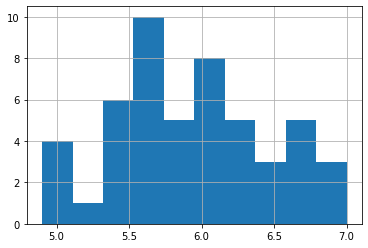

In [30]:
versicolor_sepal_length.hist()

<AxesSubplot:>

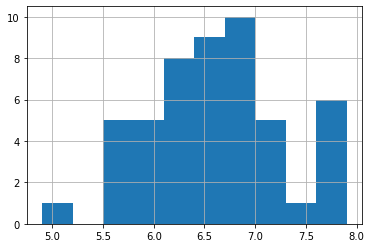

In [31]:
virginica_sepal_length.hist()

<AxesSubplot:>

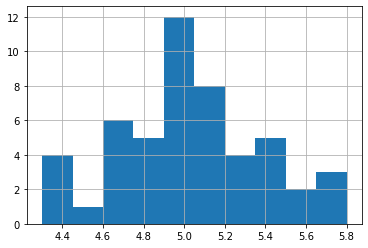

In [32]:
setosa_sepal_length.hist()

**B. State Hypotheses**

$H_{0}$: population means of the sepal length for the three species, versicolor, virginica & setosa, are all equal.  

$H_{a}$: population means of the sepal length for the three species, versicolor, virginica & setosa, are NOT all equal. 

**C. Set Significance Level**

In [33]:
alpha = .05

**D. Verify Assumptions**

- Independent samples: YES!  
- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT). YES! the distributions are mostly normal  
- Equal Variances: YES! The variance is very small so the differences are minor. 

In [34]:
print(versicolor_sepal_length.var())
print(virginica_sepal_length.var())
print(setosa_sepal_length.var())

0.2664326530612246
0.40434285714285706
0.12424897959183666


**E. Compute test statistics**

In [35]:
f, p = stats.f_oneway(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)
f, p

(119.26450218450472, 1.6696691907693648e-31)

**F. Decide**

In [36]:
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


### Example 2

In [37]:
df = sns.load_dataset('mpg')
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [38]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Drop nulls

In [39]:
df = df[~df['horsepower'].isna()]

In [40]:
usa_hp = df[df.origin == 'usa'].horsepower
japan_hp = df[df.origin == 'japan'].horsepower
eu_hp = df[df.origin == 'europe'].horsepower

**Plot Distribution**

<AxesSubplot:>

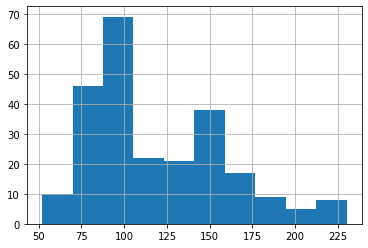

In [41]:
usa_hp.hist()

<AxesSubplot:>

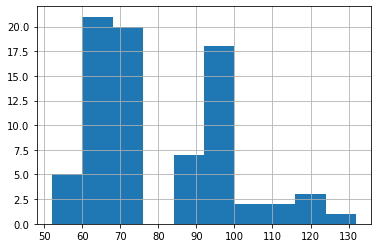

In [42]:
japan_hp.hist()

<AxesSubplot:>

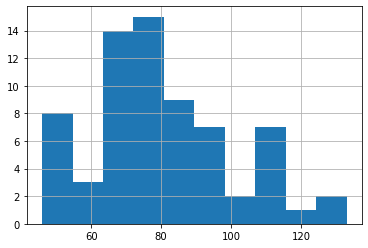

In [43]:
eu_hp.hist()

**Hypothesis**

$H_{0}$: hp is the same across all origins

$H_{a}$: hp is not the same across all origins

**Significance Level**

$\alpha$ is already set to .05

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: ?

In [44]:
usa_hp.var()

1591.8336567413864

In [45]:
japan_hp.var()

317.5238558909445

In [46]:
eu_hp.var()

406.3397717295875

Looking at the variances, they are very different, so I will move to a 2-sample, independent t-test comparing usa made cars vs. non-usa made cars. 

In [47]:
usa_hp = df[df.origin == 'usa'].horsepower
non_usa_hp = df[df.origin != 'usa'].horsepower

**Hypothesis**

$H_{0}$: usa origin cars' hp equals non-usa origin cars' hp

$H_{a}$: usa origin cars' hp does not equal non-usa origin cars' hp

**Significance Level**

$\alpha$ is already set to .05

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: ?

In [48]:
print(usa_hp.var())
print(non_usa_hp.var())

1591.8336567413864
356.2380020501352


In [49]:
t, p = stats.ttest_ind(usa_hp, non_usa_hp, equal_var = False)
t, p

(13.017135027378012, 3.384733024288272e-32)

**Decide**

is p-value less than alpha? 

In [50]:
p < alpha

True

Reject null hypothesis. The hp of usa cars vs. non-usa cars is significantly different. 

In [51]:
stats.kruskal(usa_hp, japan_hp, eu_hp)

KruskalResult(statistic=105.59475799843663, pvalue=1.1759521262123952e-23)

Using Kruskal-Wallis test, non-parametric test for ANOVA, also shows us that the mean HP of the cars from the 3 origins is significantly different. 

__________________________________

## Example x

$H_{0}$: there is no difference in mpg of cars made in japan vs. europe.  

$H_{a}$: there IS a difference in mpg of cars made in japan vs. europe. 

In [52]:
j_mpg = df[df.origin == 'japan'].mpg

e_mpg = df[df.origin == 'europe'].mpg

**Distribution plot**

<AxesSubplot:>

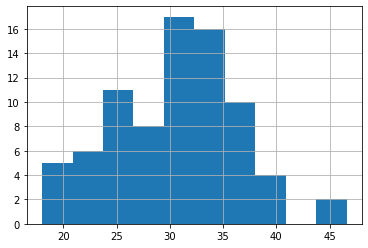

In [53]:
j_mpg.hist()

<AxesSubplot:>

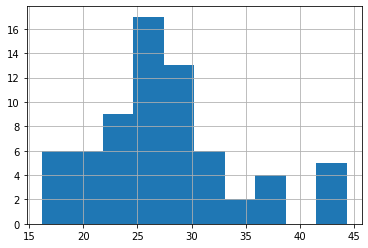

In [54]:
e_mpg.hist()

In [55]:
j_mpg.var()

37.08868549172349

In [56]:
e_mpg.var()

43.298797190517995

In [57]:
t, p = stats.ttest_ind(j_mpg, e_mpg)
t, p

(2.723324735392516, 0.007256875026960007)

In [58]:
p < alpha

True

Reject the $H_{0}$, i.e. there is a significant difference in mpg in cars from japan vs. europe. 

### Example

$H_{0}$: there is no difference in horsepower of cars made in japan vs. europe.  

$H_{a}$: there IS a difference in horsepower of cars made in japan vs. europe. 

In [59]:
t, p = stats.ttest_ind(japan_hp, eu_hp)
t, p

(-0.23093695241338835, 0.8176893173506833)

In [60]:
p < alpha

False

Fail to reject our $H_{0}$, i.e. there is no significant difference in the hp or cars made in japan vs. europe. 

### Exercise

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [61]:
n_1 = 40
μ_1 = 90
σ_1 = 15

n_2 = 50
μ_2 = 100
σ_2 = 20

alpha = .05

In [62]:
office_1 = np.random.normal(μ_1,σ_1,n_1)
office_1 = pd.DataFrame(office_1)
office_1.head()

,0
0,57.063073
1,68.163457
2,80.388979
3,103.910259
4,79.557942


<AxesSubplot:ylabel='Count'>

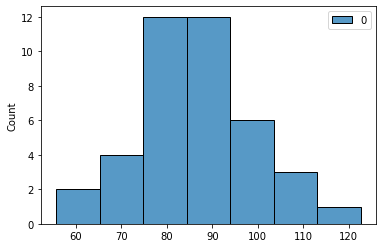

In [63]:
sns.histplot(office_1)

In [64]:
office_2 = np.random.normal(μ_2,σ_2,n_2)
office_2 = pd.DataFrame(office_2)
office_2.head()

,0
0,113.979648
1,94.793124
2,126.686709
3,115.677336
4,79.909954


<AxesSubplot:ylabel='Count'>

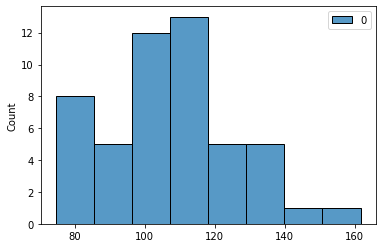

In [65]:
sns.histplot(office_2)

In [66]:
office_1.var()

0    195.217228
dtype: float64

In [67]:
office_2.var()

0    342.710216
dtype: float64

In [68]:
t, p = stats.ttest_ind(office_1[0], office_2[0], equal_var=False)
t, p

(-6.555679514617001, 3.6808130716857623e-09)

#### Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [69]:
from pydataset import data 
df = data('mpg')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [70]:
df['year'].value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [72]:
df['mpg'] = (df['cty'] + df['hwy'])/ 2
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [73]:
oh_eight = df[df['year']==2008]
oh_eight

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact,23.0
14,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact,21.0
15,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact,20.0
17,audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize,21.0
18,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,p,midsize,19.5
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,17.0


In [74]:
nine_nine = df[df['year']==1999]
nine_nine

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5
12,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact,20.0
13,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact,21.0
16,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,19.5
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv,15.0


In [75]:
oh_eight_mpg = oh_eight['mpg']
oh_eight_mpg

3      25.5
4      25.5
7      22.5
10     24.0
11     23.0
14     21.0
15     20.0
17     21.0
18     19.5
19     17.0
20     13.0
21     17.0
23     14.5
26     21.0
27     20.0
28     19.5
29     16.5
30     12.5
34     26.0
36     23.5
37     21.5
42     20.5
43     20.5
44     14.0
47     19.5
48     19.5
49     17.0
50     16.0
53     16.5
54     16.5
55     10.5
59     15.0
60     10.5
61     15.0
63     15.5
65     14.0
66     10.5
67     15.0
68     15.0
69     14.0
70     10.5
73     15.0
77     15.0
81     16.0
82     16.0
88     15.0
90     15.0
93     21.5
94     20.0
97     19.0
98     18.5
99     17.0
105    30.0
106    30.5
107    30.0
108    25.0
111    25.5
112    26.0
115    23.5
118    24.0
119    23.5
120    20.5
121    20.0
122    20.5
123    19.5
124    17.0
127    10.5
128    16.5
129    15.5
130    12.5
132    15.0
133    15.0
137    15.0
139    16.0
140    16.0
144    27.0
145    27.5
146    23.0
147    22.5
150    22.0
153    17.0
154    15.0
158    23.0
159 

In [76]:
nine_nine_mpg = nine_nine['mpg']
nine_nine_mpg

1      23.5
2      25.0
5      21.0
6      22.0
8      22.0
9      20.5
12     20.0
13     21.0
16     19.5
22     15.0
24     21.0
25     19.0
31     13.0
32     15.5
33     23.0
35     22.0
38     21.0
39     20.5
40     19.0
41     19.0
45     18.5
46     18.0
51     15.0
52     15.5
56     14.0
57     13.0
58     15.0
62     13.5
64     13.0
71     13.0
72     13.5
74     13.0
75     14.0
76     14.0
78     15.5
79     17.0
80     15.5
83     15.0
84     15.5
85     15.5
86     14.5
87     14.5
89     13.0
91     22.0
92     21.5
95     18.0
96     18.5
100    30.5
101    28.0
102    28.5
103    26.0
104    28.0
109    22.0
110    22.5
113    22.0
114    22.0
116    22.5
117    24.0
125    17.5
126    15.5
131    13.0
134    13.0
135    14.0
136    13.5
138    15.5
141    15.0
142    25.0
143    23.0
148    22.0
149    22.0
151    15.5
152    16.0
155    22.0
156    21.0
157    22.0
160    21.5
161    21.0
166    23.5
167    22.5
168    22.5
169    22.5
174    17.5
175    18.0
176 

<AxesSubplot:xlabel='mpg', ylabel='Count'>

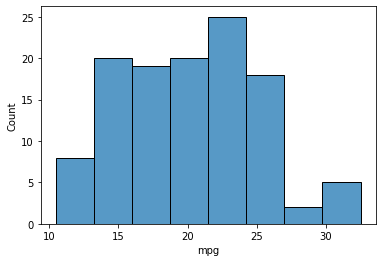

In [77]:
sns.histplot(oh_eight_mpg)

<AxesSubplot:xlabel='mpg', ylabel='Count'>

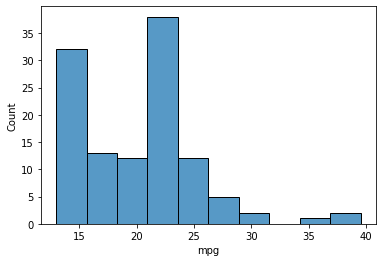

In [78]:
sns.histplot(nine_nine_mpg)

In [79]:
t, p = stats.ttest_ind(oh_eight_mpg, nine_nine_mpg, equal_var=False)
t, p

(-0.21960177245940962, 0.8263750772060638)

### Are compact cars more fuel-efficient than the average car? 

In [80]:
compact = df[df['class']=='compact']
compact_mpg = compact['mpg']
compact_mpg.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: mpg, dtype: float64

In [81]:
compact_mpg.mean()

24.21276595744681

In [82]:
avg_mpg = df['mpg']
avg_mpg

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: mpg, Length: 234, dtype: float64

In [83]:
avg_mpg.mean()

20.14957264957265

In [84]:
alpha = .05

In [85]:
t, p = stats.ttest_1samp(compact_mpg, avg_mpg.mean())

print(t, p/2, alpha)

7.896888573132535 2.0992818971585668e-10 0.05


### Do manual cars get better gas mileage than automatic cars?

In [86]:
df['auto_cars'] = df['trans'].str.startswith('a', na=False)

In [87]:
df['manual_cars'] = df['trans'].str.startswith('m', na=False)

In [88]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg,auto_cars,manual_cars
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True,False
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False,True
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False,True
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True,False
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True,False


In [89]:
manual_mpg = df[df['manual_cars']==True]
manual_mpg['mpg']

2      25.0
3      25.5
6      22.0
8      22.0
10     24.0
13     21.0
15     20.0
24     21.0
26     21.0
28     19.5
49     17.0
52     15.5
56     14.0
65     14.0
69     14.0
70     10.5
72     13.5
79     17.0
85     15.5
86     14.5
91     22.0
93     21.5
96     18.5
97     19.0
99     17.0
100    30.5
102    28.5
103    26.0
105    30.0
108    25.0
110    22.5
112    26.0
114    22.0
117    24.0
118    24.0
121    20.0
122    20.5
142    25.0
145    27.5
146    23.0
149    22.0
152    16.0
160    21.5
162    23.5
163    22.0
167    22.5
168    22.5
172    22.0
173    23.5
174    17.5
177    16.0
180    25.0
182    26.0
185    22.0
188    25.0
189    26.0
192    22.0
196    30.5
197    32.5
201    17.5
203    19.5
204    16.0
206    16.5
208    25.0
210    25.0
212    20.5
213    38.5
214    25.0
217    25.0
219    25.0
221    20.5
222    39.5
224    25.0
226    24.0
228    25.0
231    25.0
233    22.0
Name: mpg, dtype: float64

In [90]:
auto_mpg = df[df['auto_cars']==True]
auto_mpg['mpg']

1      23.5
4      25.5
5      21.0
7      22.5
9      20.5
11     23.0
12     20.0
14     21.0
16     19.5
17     21.0
18     19.5
19     17.0
20     13.0
21     17.0
22     15.0
23     14.5
25     19.0
27     20.0
29     16.5
30     12.5
31     13.0
32     15.5
33     23.0
34     26.0
35     22.0
36     23.5
37     21.5
38     21.0
39     20.5
40     19.0
41     19.0
42     20.5
43     20.5
44     14.0
45     18.5
46     18.0
47     19.5
48     19.5
50     16.0
51     15.0
53     16.5
54     16.5
55     10.5
57     13.0
58     15.0
59     15.0
60     10.5
61     15.0
62     13.5
63     15.5
64     13.0
66     10.5
67     15.0
68     15.0
71     13.0
73     15.0
74     13.0
75     14.0
76     14.0
77     15.0
78     15.5
80     15.5
81     16.0
82     16.0
83     15.0
84     15.5
87     14.5
88     15.0
89     13.0
90     15.0
92     21.5
94     20.0
95     18.0
98     18.5
101    28.0
104    28.0
106    30.5
107    30.0
109    22.0
111    25.5
113    22.0
115    23.5
116    22.5
119 

In [91]:
t, p = stats.ttest_ind(manual_mpg['mpg'], auto_mpg['mpg'], equal_var = False)
t, p/2

(4.443514012903071, 8.976124499958965e-06)

### Correlation Exercises

##### Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [92]:
df = pd.read_csv("Cust_Churn_Telco.csv")  
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


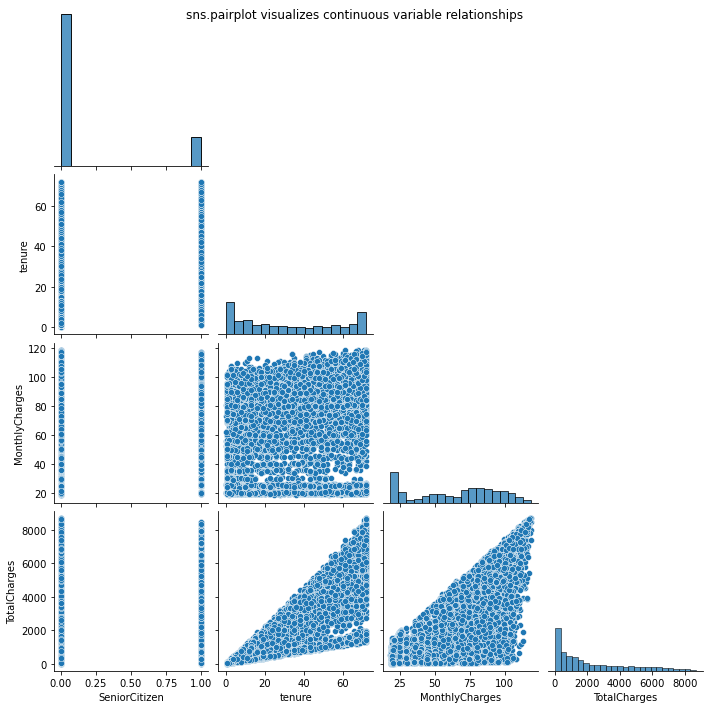

In [93]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

In [94]:
x = df.tenure
y = df.MonthlyCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

In [95]:
x = df[df['tenure'] > 0].tenure
y = df[df['TotalCharges'] > 0].TotalCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.8258804609332093, 0.0)

In [96]:
corr, p = stats.pearsonr(df.TotalCharges > 0, df.tenure)
corr, p

(0.052134674964233234, 1.2006106325909794e-05)

In [97]:
corr, p = stats.pearsonr(df.PhoneService == 'Yes', df.tenure)
corr, p

(0.00844820673274407, 0.4783976196129876)

In [98]:
corr, p = stats.pearsonr(df.InternetService == 'DSL', df.tenure)
corr, p

(0.013274087649273816, 0.2653448013146781)

In [99]:
x = df[df['tenure'] > 0].InternetService == 'Fiber Optic'
y = df[df['tenure'] > 0].tenure

corr, p = stats.pearsonr(x, y)
corr, p

/opt/homebrew/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


(nan, nan)

### Use the employees database.
Is there a relationship between how long an employee has been with the company and their salary?

In [100]:
from env import host, user, password
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [101]:
sql = """
select datediff(curdate(), hire_date) as days_on_job, salary
from employees
join salaries using(emp_no)
where to_date > curdate();
"""

In [102]:
df = pd.read_sql(sql, url)
df.head()

,days_on_job,salary
0,12831,88958
1,13048,72527
2,12768,43311
3,12673,74057
4,11657,94692


<AxesSubplot:xlabel='days_on_job', ylabel='salary'>

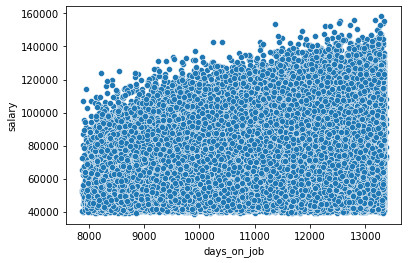

In [103]:
sns.scatterplot(x="days_on_job", y="salary", data=df)

null: There is not a linear correlation between employee tenure and salary

alternative: There is a linear correlation between employee tenure and salary

In [104]:
corr, p = stats.pearsonr(df.days_on_job, df.salary)
corr, p

(0.30646256131860894, 0.0)

Since P > Alpha, we reject the null hypothesis

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

null: There is no linear correlation between tenure and number of titles

alternative: There is a linear correlation between tenure and number of titles

In [105]:
sql = """
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
"""

In [106]:
df = pd.read_sql(sql, url)
df.head()

,emp_no,title_count,days_on_job
0,10001,1,12831
1,10002,1,13048
2,10003,1,12768
3,10004,2,12673
4,10005,2,11657


In [107]:
corr, p = stats.pearsonr(df.days_on_job, df.title_count)

corr, p

(0.2665989299136427, 0.0)

Since p < Alpha:

We reject the null hypothesis

### Use the sleepstudy data. Is there a relationship between days and reaction time?

In [108]:
from pydataset import data
data('sleepstudy')
sleepstudy = pd.DataFrame(data('sleepstudy'))
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


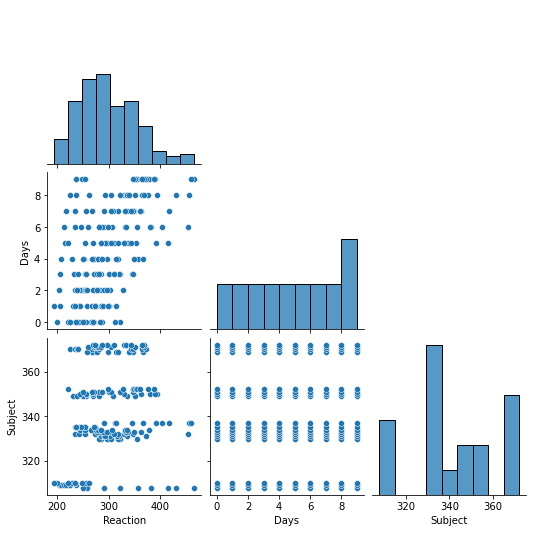

In [109]:
sns.pairplot(sleepstudy, corner=True)

null: There is no linear correlation between days and reaction time

alternative: There IS a linear correlation between days and reaction time

In [110]:
corr, p = stats.pearsonr(sleepstudy['Days'], sleepstudy['Reaction'])
corr, p

(0.5352302262650253, 9.894096322214812e-15)

Since p < alpha: 

We reject the null hypothesis

# Chi Square

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [111]:
index = ['Uses a Macbook', 'Doesnt Use a Macbook']
columns = ['Codeup Student', 'Not Codeup Student']
observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesnt Use a Macbook,1,30


Null Hypothesis: There is no association between being a Codeup student and using a macbook

Alternative: There is an association between being a Codeup student and using a mackbook

In [112]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [113]:
alpha = .05

In [114]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.0000


In [115]:
null_hypothesis = "using a Macbook and being a Codeup student is independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")


We reject the hypothesis that using a Macbook and being a Codeup student is independent


Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [116]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [117]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

Null Hypothesis: There is no correlation between mpg and cylinders

Alternative Hypothesis: There is a correlation between mpg and cylinders

In [118]:
observed = pd.crosstab(df.cylinders, df.mpg)
observed

mpg,9.0,10.0,11.0,12.0,13.0,14.0,14.5,15.0,15.5,16.0,...,39.4,40.8,40.9,41.5,43.1,43.4,44.0,44.3,44.6,46.6
cylinders,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,4,0,5,...,0,0,0,0,0,0,0,0,0,0
8,1,2,4,6,20,19,1,12,5,8,...,0,0,0,0,0,0,0,0,0,0


In [119]:
observed = pd.crosstab(df.mpg, df.cylinders)
observed

cylinders,3,4,5,6,8
mpg,,,,,
9.0,0,0,0,0,1
10.0,0,0,0,0,2
11.0,0,0,0,0,4
12.0,0,0,0,0,6
13.0,0,0,0,0,20
14.0,0,0,0,0,19
14.5,0,0,0,0,1
15.0,0,0,0,4,12
15.5,0,0,0,0,5


In [146]:
alpha = .05

In [147]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [148]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038     13]
 [179962     11]]
---
Expected

[[120041      9]
 [179958     14]]
---

chi^2 = 1.4567
p     = 0.2275


In [149]:
null_hypothesis = "mpg and cylinders are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")


We fail to reject the null hypothesis


### Use the data from the employees database to answer these questions:

### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

null hypothesis: There is no association between gender and whether an employee works in sales or marketing

alternate hypothese: There is an association between gender and whether an employee works in sales or marketing

In [124]:
from env import host, user, password
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [125]:
sql = """
select gender, dept_name
from employees
join dept_emp using(emp_no)
join departments using(dept_no)
where to_date > curdate();
"""

In [126]:
df = pd.read_sql(sql, url)
df

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [127]:
df = pd.crosstab(df.gender, df.dept_name)
df

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
gender,,,,,,,,,
F,7007,24533,5014,5147,5864,21393,5872,6181,14999
M,10562,36853,7423,7751,8978,31911,8674,9260,22702


In [128]:
observed = df.drop(columns = ['Customer Service','Development','Finance','Human Resources','Production','Quality Management','Research'])
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [129]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [130]:
alpha = .05

In [131]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893 14969]
 [ 8948 22731]]
---

chi^2 = 0.3240
p     = 0.5692


In [132]:
null_hypothesis = "gender and Departments are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Is an employee's gender independent of whether or not they are or have been a manager?

Null hypothesis: There is no association between gender and whether or not they have been a manager

Alternative hypothesis: There is an association between gender and whether or not they have been a manager

In [133]:
sql = """
select dept_name, emp_no
from employees
join dept_emp using(emp_no)
join departments using(dept_no)
join dept_manager using(emp_no);
"""

In [134]:
managers = pd.read_sql(sql, url)
managers

,dept_name,emp_no
0,Marketing,110022
1,Marketing,110039
2,Finance,110085
3,Finance,110114
4,Human Resources,110183
5,Human Resources,110228
6,Production,110303
7,Production,110344
8,Production,110386
9,Production,110420


In [135]:
sql = """
select gender, emp_no
from employees;
"""

In [136]:
employees = pd.read_sql(sql, url)
employees

,gender,emp_no
0,M,10001
1,F,10002
2,M,10003
3,M,10004
4,M,10005
...,...,...
300019,F,499995
300020,M,499996
300021,M,499997
300022,M,499998


In [137]:
employees_and_managers = pd.merge(employees, managers, on = "emp_no", how = 'outer')
employees_and_managers

,gender,emp_no,dept_name
0,M,10001,NaN
1,F,10002,NaN
2,M,10003,NaN
3,M,10004,NaN
4,M,10005,NaN
...,...,...,...
300019,F,499995,NaN
300020,M,499996,NaN
300021,M,499997,NaN
300022,M,499998,NaN


In [138]:
is_manager = pd.notnull(employees_and_managers.dept_name)
employees_and_managers['is_manager'] = is_manager

In [139]:
observed = pd.crosstab(employees_and_managers.gender, employees_and_managers.is_manager)
observed

is_manager,False,True
gender,,
F,120038,13
M,179962,11


In [140]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [141]:
alpha = .05

In [142]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038     13]
 [179962     11]]
---
Expected

[[120041      9]
 [179958     14]]
---

chi^2 = 1.4567
p     = 0.2275


In [143]:
null_hypothesis = "gender and whether or not they've been a manager are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis
